In [5]:
import numpy as np
import time, os, glob, pickle
import matplotlib.pyplot as plt
from misc import show_plots, load_agent
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
np.array(data[0]["scores"]).shape

(2900, 2)

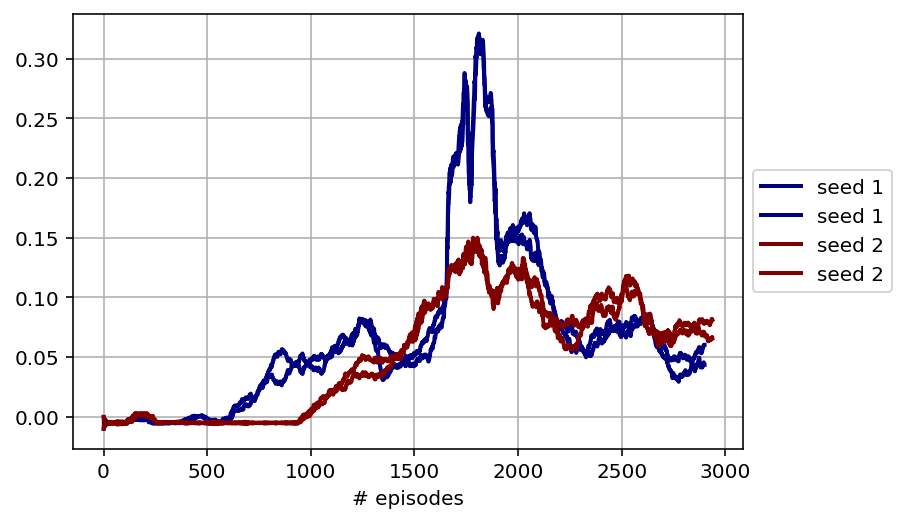

In [73]:
folders = ["trained/ddpg", "trained/ddpg_new_seed"]
           
labels = ["seed 1", "seed 2"]
train_time = "last"

def show_plots(data, labels=None, max_episodes=None, only_mean=False, legend_outside=False):
    if max_episodes == None:
        # Find max number of episodes
        max_episodes = 0
        for i in range(len(data)):
            if len(data[i]["mean_scores"]) > max_episodes:
                max_episodes = len(data[i]["mean_scores"])

    fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap("jet", max([len(data), 2]))
    for i in range(len(data)):
        if labels is not None:
            label = labels[i]
        else:
            label = None
        mean_score = data[i]["mean_scores"]
        score = data[i]["scores"]
        if len(np.array(score).shape) > 1:
            n_agents = np.array(score).shape[1]
        else:
            n_agents = 1
        if len(mean_score) < max_episodes:
            temp = np.nan * np.ones(())
            mean_score = np.concatenate(
                (mean_score, np.nan * np.ones((max_episodes-len(mean_score), n_agents)).squeeze()))
            score = np.concatenate(
                (score, np.nan * np.ones((max_episodes-len(score), n_agents)).squeeze()))
        if not only_mean:
            ax.plot(np.arange(1, max_episodes+1),
                    score, alpha=0.3, color=cmap(i))
        ax.plot(np.arange(1, max_episodes+1), mean_score,
                label=label, color=cmap(i), linewidth=2)
    if labels is not None:
        if legend_outside:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        else:
            ax.legend()
    ax.set_xlabel("# episodes")
    ax.grid()

data = [load_agent(folder) for folder in folders]
show_plots(data, labels=labels, only_mean=True, legend_outside=True)
# plt.xlim([0,100])
# plt.ylim([-0.1,0.1])
# plt.savefig("Initial attempts.png", dpi=100, bbox_inches='tight')

In [ ]:
data = [load_agent(folder) for folder in folders]

In [ ]:
len(data)

In [ ]:
plt.plot(data["mean_scores"])

In [ ]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = None
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)
show_plots(mean_scores, scores, labels=labels, only_mean=False)
plt.savefig("DDPG Solved.png", dpi=100)

In [ ]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128",
          "double_400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = ["DDPG", "Double DDPG"]
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)
show_plots(mean_scores, scores, labels=labels, only_mean=False)
plt.savefig("DDPG vs Double DDPG.png", dpi=100)

Save weights

In [ ]:
folders = ["400_300_chunk_actor_1e-4_critic_1e-4_batch_128",
          "double_400_300_chunk_actor_1e-4_critic_1e-4_batch_128"]
labels = ["DDPG", "Double DDPG"]
train_time = "last"
mean_scores, scores, actor_dicts, critic_dicts = load_folders(folders, train_time=train_time)

torch.save(actor_dicts[0], "checkpoint_actor_DDPG.pth")
torch.save(critic_dicts[0], "checkpoint_critic_DDPG.pth")
torch.save(actor_dicts[1], "checkpoint_actor_Double_DDPG.pth")
torch.save(critic_dicts[1], "checkpoint_critic_Double_DDPG.pth")

In [ ]:
(570 - 359) / 570